In [1]:
import numpy as np
import pandas as pd
import numpy as np
import tensorflow as tf
#from keras.models import Sequential
#from keras.layers import Dense

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/madhumitha/Downloads/hotel_bookings.csv")
df.columns 

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [3]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [4]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
#most of the 90% of the values in the "company column" is NaN. So let us drop that column.
df = df.drop(columns = ["company"])

In [6]:
#let's just have the total count of the customers instead of separately having as adults, children and babies
df['adults'] = df['adults'] + df['children'] + df['babies']
df.rename(columns={"adults": "people_count"},inplace = True)
df = df.drop(columns = ["children", "babies"])

In [7]:
df = df.drop(columns = 'arrival_date_week_number')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,people_count,meal,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,1,0,0,2.0,BB,...,3,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,1,0,0,2.0,BB,...,4,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,1,0,1,1.0,BB,...,0,No Deposit,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,1,0,1,1.0,BB,...,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,1,0,2,2.0,BB,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,30,2,5,2.0,BB,...,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,31,2,5,3.0,BB,...,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,31,2,5,2.0,BB,...,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,31,2,5,2.0,BB,...,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [8]:
corr_df=df.corr()
corr_df

,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,people_count,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,-0.006130,-0.001791,0.024765,0.046506,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.002268,0.085671,0.165799,0.072279,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.000221,0.021497,0.030883,0.052152,0.010341,-0.119822,0.029218,0.030872,0.063457,-0.056497,0.197580,-0.013684,0.108531
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,1.000000,-0.016354,-0.028174,0.006758,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,-0.016354,1.000000,0.498969,0.101439,-0.087239,-0.012775,-0.042715,0.063281,0.140739,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,-0.028174,0.498969,1.000000,0.101670,-0.097245,-0.013992,-0.048743,0.096209,0.182382,-0.002020,0.065237,-0.024859,0.068192
people_count,0.046506,0.072279,0.052152,0.006758,0.101439,0.101670,1.000000,-0.136747,-0.020057,-0.099096,-0.003168,0.004498,-0.026429,0.368144,0.047938,0.156816
is_repeated_guest,-0.084793,-0.124410,0.010341,-0.006145,-0.087239,-0.097245,-0.136747,1.000000,0.082293,0.418056,0.012092,0.031527,-0.022235,-0.134314,0.077090,0.013050
previous_cancellations,0.110133,0.086042,-0.119822,-0.027011,-0.012775,-0.013992,-0.020057,0.082293,1.000000,0.152728,-0.026993,-0.012488,0.005929,-0.065646,-0.018492,-0.048384
previous_bookings_not_canceled,-0.057358,-0.073548,0.029218,-0.000300,-0.042715,-0.048743,-0.099096,0.418056,0.152728,1.000000,0.011608,0.023252,-0.009397,-0.072144,0.047653,0.037824


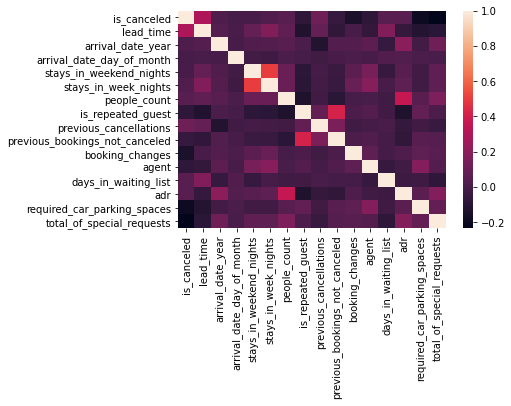

In [9]:
# let us further see the correlation between the hotel booking cancellation and other column values
corr_df=df.corr()
sns.heatmap(corr_df)

In [10]:
#let us convert all strings into numbers 

#df['col_name'].unique

print(pd.Categorical(df['hotel']),end="\n\n")
print(pd.Categorical(df['meal']),end="\n\n")
print(pd.Categorical(df['reserved_room_type']),end="\n\n")
print(pd.Categorical(df['assigned_room_type']),end="\n\n")
print(pd.Categorical(df['deposit_type']),end="\n\n")
print(pd.Categorical(df['customer_type']),end="\n\n")
print(pd.Categorical(df['reservation_status']))

[Resort Hotel, Resort Hotel, Resort Hotel, Resort Hotel, Resort Hotel, ..., City Hotel, City Hotel, City Hotel, City Hotel, City Hotel]
Length: 119390
Categories (2, object): [City Hotel, Resort Hotel]

[BB, BB, BB, BB, BB, ..., BB, BB, BB, BB, HB]
Length: 119390
Categories (5, object): [BB, FB, HB, SC, Undefined]

[C, C, A, A, A, ..., A, E, D, A, A]
Length: 119390
Categories (10, object): [A, B, C, D, ..., G, H, L, P]

[C, C, C, A, A, ..., A, E, D, A, A]
Length: 119390
Categories (12, object): [A, B, C, D, ..., I, K, L, P]

[No Deposit, No Deposit, No Deposit, No Deposit, No Deposit, ..., No Deposit, No Deposit, No Deposit, No Deposit, No Deposit]
Length: 119390
Categories (3, object): [No Deposit, Non Refund, Refundable]

[Transient, Transient, Transient, Transient, Transient, ..., Transient, Transient, Transient, Transient, Transient]
Length: 119390
Categories (4, object): [Contract, Group, Transient, Transient-Party]

[Check-Out, Check-Out, Check-Out, Check-Out, Check-Out, ..., Che

In [11]:
df['hotel'] = df['hotel'].astype('category')
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)


df['meal'] = df['meal'].astype('category')
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)


df['reserved_room_type'] = df['reserved_room_type'].astype('category')
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)


df['assigned_room_type'] = df['assigned_room_type'].astype('category')
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)


df['deposit_type'] = df['deposit_type'].astype('category')
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)


df['customer_type'] = df['customer_type'].astype('category')
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)


df['reservation_status'] = df['reservation_status'].astype('category')
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)


df['market_segment'] = df['market_segment'].astype('category')
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)


df['distribution_channel'] = df['distribution_channel'].astype('category')
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)


In [12]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,people_count,meal,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,July,1,0,0,2.0,0,...,3,0,NaN,0,2,0.0,0,0,1,2015-07-01
1,1,0,737,2015,July,1,0,0,2.0,0,...,4,0,NaN,0,2,0.0,0,0,1,2015-07-01
2,1,0,7,2015,July,1,0,1,1.0,0,...,0,0,NaN,0,2,75.0,0,0,1,2015-07-02
3,1,0,13,2015,July,1,0,1,1.0,0,...,0,0,304.0,0,2,75.0,0,0,1,2015-07-02
4,1,0,14,2015,July,1,0,2,2.0,0,...,0,0,240.0,0,2,98.0,0,1,1,2015-07-03


In [13]:
df['arrival_date_month'] = df['arrival_date_month'].replace(['January', 'February', 'March',
                                                            'April','May','June','July','August','September',
                                                            'October','November', 'December'],
                                                            ['1','2','3','4','5','6','7','8','9','10','11','12'])

In [14]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,people_count,meal,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,7,1,0,0,2.0,0,...,3,0,NaN,0,2,0.00,0,0,1,2015-07-01
1,1,0,737,2015,7,1,0,0,2.0,0,...,4,0,NaN,0,2,0.00,0,0,1,2015-07-01
2,1,0,7,2015,7,1,0,1,1.0,0,...,0,0,NaN,0,2,75.00,0,0,1,2015-07-02
3,1,0,13,2015,7,1,0,1,1.0,0,...,0,0,304.0,0,2,75.00,0,0,1,2015-07-02
4,1,0,14,2015,7,1,0,2,2.0,0,...,0,0,240.0,0,2,98.00,0,1,1,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2017,8,30,2,5,2.0,0,...,0,0,394.0,0,2,96.14,0,0,1,2017-09-06
119386,0,0,102,2017,8,31,2,5,3.0,0,...,0,0,9.0,0,2,225.43,0,2,1,2017-09-07
119387,0,0,34,2017,8,31,2,5,2.0,0,...,0,0,9.0,0,2,157.71,0,4,1,2017-09-07
119388,0,0,109,2017,8,31,2,5,2.0,0,...,0,0,89.0,0,2,104.40,0,0,1,2017-09-07


In [15]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'people_count',
       'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

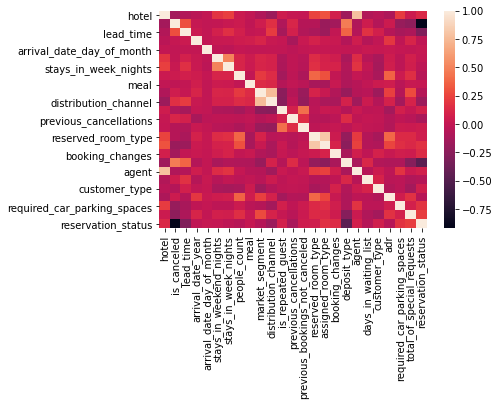

In [16]:
# To see the correlation between the features
corr_df=df.corr()
sns.heatmap(corr_df)

In [17]:
corr_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,people_count,meal,market_segment,...,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
hotel,1.000000,-0.136531,-0.075381,-0.035267,0.001862,0.186596,0.234020,0.040831,-0.008018,-0.083795,...,0.307834,0.072820,-0.159021,0.790232,-0.072432,-0.047531,-0.096719,0.218873,0.043390,0.124331
is_canceled,-0.136531,1.000000,0.293123,0.016660,-0.006130,-0.001791,0.024765,0.046506,-0.017678,0.059338,...,-0.176028,-0.144381,0.468634,-0.083114,0.054186,-0.068140,0.047557,-0.195498,-0.234658,-0.917196
lead_time,-0.075381,0.293123,1.000000,0.040142,0.002268,0.085671,0.165799,0.072279,0.000349,0.013797,...,-0.172219,0.000149,0.375667,-0.069741,0.170084,0.073403,-0.063077,-0.116451,-0.095712,-0.302175
arrival_date_year,-0.035267,0.016660,0.040142,1.000000,-0.000221,0.021497,0.030883,0.052152,0.065840,0.107697,...,0.036141,0.030872,-0.064714,0.063457,-0.056497,-0.006149,0.197580,-0.013684,0.108531,-0.017683
arrival_date_day_of_month,0.001862,-0.006130,0.002268,-0.000221,1.000000,-0.016354,-0.028174,0.006758,-0.007086,-0.004088,...,0.011646,0.010613,-0.001358,0.001487,0.022728,0.012188,0.030245,0.008683,0.003062,0.011460
stays_in_weekend_nights,0.186596,-0.001791,0.085671,0.021497,-0.016354,1.000000,0.498969,0.101439,0.045744,0.115350,...,0.086643,0.063281,-0.111435,0.140739,-0.054151,-0.109220,0.049342,-0.018554,0.072671,0.008558
stays_in_week_nights,0.234020,0.024765,0.165799,0.030883,-0.028174,0.498969,1.000000,0.101670,0.036742,0.108569,...,0.100795,0.096209,-0.076788,0.182382,-0.002020,-0.127223,0.065237,-0.024859,0.068192,-0.021607
people_count,0.040831,0.046506,0.072279,0.052152,0.006758,0.101439,0.101670,1.000000,-0.005968,0.213210,...,0.302427,-0.003168,-0.079277,0.004498,-0.026429,-0.113257,0.368144,0.047938,0.156816,-0.055258
meal,-0.008018,-0.017678,0.000349,0.065840,-0.007086,0.045744,0.036742,-0.005968,1.000000,0.145132,...,-0.120792,0.024650,-0.092151,-0.049592,-0.007132,0.044658,0.059098,-0.038923,0.023136,0.015393
market_segment,-0.083795,0.059338,0.013797,0.107697,-0.004088,0.115350,0.108569,0.213210,0.145132,1.000000,...,0.026377,-0.071818,-0.184847,-0.058719,-0.041503,-0.165814,0.232763,-0.062226,0.274373,-0.061584


In [18]:
#thus to find the bookings cancellation, we don't need these three columns, because there are very few changes out of so many rows
#df = df.drop(columns = ["total_of_special_requests", "required_car_parking_spaces", "booking_changes"])

In [19]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
people_count                          4
meal                                  0
country                             488
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0


In [20]:
sample = df.drop(columns = ["country", "stays_in_weekend_nights","agent","reservation_status_date"])

In [21]:
sample.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_day_of_month',
       'stays_in_week_nights', 'people_count', 'meal', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status'],
      dtype='object')

In [22]:
sample = sample.dropna()
sample.iloc[:,21:25]
sample.dtypes

hotel                                int8
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_day_of_month           int64
stays_in_week_nights                int64
people_count                      float64
meal                                 int8
market_segment                       int8
distribution_channel                 int8
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                   int8
assigned_room_type                   int8
booking_changes                     int64
deposit_type                         int8
days_in_waiting_list                int64
customer_type                        int8
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
reservation_status                

In [23]:
x = sample[['hotel', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'stays_in_week_nights', 'people_count', 'meal',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status']]
y = sample['is_canceled']

print(x.shape)
print(y.shape)

(119386, 22)
(119386,)


In [24]:
x = x.astype(int)
y = y.astype(int)

In [25]:
type(x)

pandas.core.frame.DataFrame

In [26]:
from sklearn.model_selection import train_test_split         
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state= 1)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

def get_model():
    
    model = Sequential([
        Dense(30, input_shape = (22,),activation = "sigmoid"),
        Dense(1, activation = "sigmoid")
    ])

    model.compile(
       loss = "binary_crossentropy" ,           # to see how many predicted labels match with the ground labels
       optimizer = "adam",
       metrics = ["categorical_accuracy"])
    
    return model

model = get_model()

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                690       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________


In [28]:
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback

early_stopping = EarlyStopping(monitor='loss',mode='min',verbose=1, patience=2) # to minimize the loss

model = get_model()


history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 5,
    #validation_steps=1,
    callbacks = [early_stopping]
)

Epoch 1/5
2799/2799 [==============================] - 7s 3ms/step - loss: 0.6219 - categorical_accuracy: 1.0000 - val_loss: 0.6190 - val_categorical_accuracy: 1.0000
Epoch 2/5
2799/2799 [==============================] - 6s 2ms/step - loss: 0.4099 - categorical_accuracy: 1.0000 - val_loss: 0.1429 - val_categorical_accuracy: 1.0000
Epoch 3/5
2799/2799 [==============================] - 6s 2ms/step - loss: 0.0968 - categorical_accuracy: 1.0000 - val_loss: 0.0671 - val_categorical_accuracy: 1.0000
Epoch 4/5
2799/2799 [==============================] - 7s 2ms/step - loss: 0.0637 - categorical_accuracy: 1.0000 - val_loss: 0.0541 - val_categorical_accuracy: 1.0000
Epoch 5/5
2799/2799 [==============================] - 6s 2ms/step - loss: 0.0703 - categorical_accuracy: 1.0000 - val_loss: 0.0641 - val_categorical_accuracy: 1.0000


In [29]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss is : ",loss)
print("Accuracy is : ",accuracy*100)

933/933 [==============================] - 1s 1ms/step - loss: 0.0641 - categorical_accuracy: 1.0000
Loss is :  0.06410389393568039
Accuracy is :  100.0


In [30]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    

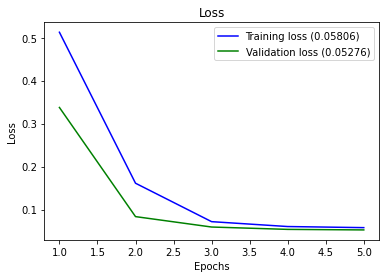

In [86]:
plot_history(history)

In [32]:
example =pd.DataFrame(X_test.iloc[400,:])
example

,118728
hotel,0
lead_time,2
arrival_date_year,2017
arrival_date_month,8
stays_in_week_nights,1
people_count,2
meal,0
market_segment,4
distribution_channel,3
is_repeated_guest,0


In [33]:
ground_label = list(y_test)
ground_label[400]

0

In [34]:
example= np.asarray(example).astype(np.float32)
#np.reshape(example,22)
reshaped_sample = np.array(example).reshape(1,22)
reshaped_sample.shape
result=model.predict(reshaped_sample)
result 

array([[0.02899]], dtype=float32)

In [35]:
x = round(float(result[0]))
x

0

In [36]:
example =pd.DataFrame(X_test.iloc[300,:])
example

,42365
hotel,0
lead_time,65
arrival_date_year,2015
arrival_date_month,9
stays_in_week_nights,1
people_count,2
meal,0
market_segment,4
distribution_channel,3
is_repeated_guest,0


In [37]:
ground_label = list(y_test)
ground_label[300]

1

In [38]:
example= np.asarray(example).astype(np.float32)
reshaped_sample = np.array(example).reshape(1,22)
reshaped_sample.shape
result=model.predict(reshaped_sample)
result 

array([[0.9703204]], dtype=float32)

In [39]:
x = round(float(result[0]))
x

1